In [1]:
#Importing necessary packages and libraries
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.tokenize import RegexpTokenizer
import re
import string
from nltk.stem import WordNetLemmatizer 

In [3]:
#scraped CSV into dataframe
df=pd.read_csv('file.csv')
df.shape

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(135742, 35)

In [4]:
df[df.language=='en'].to_csv('english_results.csv')

In [5]:
df1=pd.read_csv('LIWC_English_results.csv')

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,7,16,17,18,24,25,26,27,28,29,30,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data=df[df.language=='en']

In [7]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near',
       'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [8]:
df3=pd.concat([df1, data], axis=1 )

In [9]:
df3=df3[['username','Tone', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'tweet']]

In [10]:
df3

,username,Tone,posemo,negemo,anx,anger,sad,tweet
0,cjthesmartguy,25.77,0.00,0.00,0.00,0.0,0.00,"“Respect me to the utmost when you see me, tha..."
1,sunny_1747,25.77,1.96,1.96,0.00,0.0,1.96,"Once read his interview, you may feel good ht..."
2,winterdownfall,98.87,5.88,0.00,0.00,0.0,0.00,I feel that. Still hate some mf from middle sc...
3,scousetilidie,1.00,0.00,10.00,0.00,10.0,0.00,#JeremyVine I feel the teachers and teaching a...
4,ashwxxn,1.00,0.00,6.90,3.45,0.0,0.00,Well for me I told my mom that it was making m...
...,...,...,...,...,...,...,...,...
135734,spain,NaN,NaN,NaN,NaN,NaN,NaN,Chilling out in #Ibiza is very easy. The inten...
135735,wingsscotparty,NaN,NaN,NaN,NaN,NaN,NaN,Never again.......but with the way things are ...
135738,djnaves,NaN,NaN,NaN,NaN,NaN,NaN,We feel so privileged to be able to share our ...
135740,boremo_,NaN,NaN,NaN,NaN,NaN,NaN,Life feels so much better when in a good space...


In [11]:
df3[df3.sad>20].tweet

51        I want to meet someone who makes me feel the w...
264       I feel you on that...  although Dressrosa had ...
1292      And thanks to the NHS shutting down, and STILL...
1595      Idk why but whenever i feel something ominous ...
1988      seeing people have tragic lives or do dumb thi...
                                ...                        
125286    It feels like you share a psychic bond with so...
125541    It feels like you share a psychic bond with so...
126821    See backing away and changing their mind is ok...
127217                         i feel sick to my stomach yo
127293                               I feel u bub ..... °~°
Name: tweet, Length: 255, dtype: object

In [12]:
df3[df3.sad>15]

,username,Tone,posemo,negemo,anx,anger,sad,tweet
51,jordan67032671,1.00,0.0,33.33,0.0,0.0,33.33,I want to meet someone who makes me feel the w...
113,NaN,1.00,0.0,16.67,0.0,0.0,16.67,NaN
245,natekingsoul,1.00,0.0,16.67,0.0,0.0,16.67,Feels like just last week I was seeing ppl twe...
264,kwtfromnola,1.00,0.0,25.00,0.0,0.0,25.00,I feel you on that... although Dressrosa had ...
770,miyaslime,25.77,20.0,20.00,0.0,0.0,20.00,They make you feel like fucking shit and use “...
...,...,...,...,...,...,...,...,...
126821,_hiyahannah,1.00,0.0,27.27,0.0,0.0,27.27,See backing away and changing their mind is ok...
127217,shamiraplainly,1.00,0.0,25.00,0.0,0.0,25.00,i feel sick to my stomach yo
127293,jikooksdynamite,1.00,0.0,25.00,0.0,0.0,25.00,I feel u bub ..... °~°
127401,haven_4419,1.00,0.0,20.00,0.0,0.0,20.00,feel betrayed.. Feel useless and feel wanna cr...


In [13]:
lonely_data=df3

In [14]:
lonely_data= lonely_data[['username','Tone', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'tweet']]

In [15]:
final_data=lonely_data.dropna(axis=0)

In [16]:
final_data

,username,Tone,posemo,negemo,anx,anger,sad,tweet
0,cjthesmartguy,25.77,0.00,0.00,0.00,0.00,0.00,"“Respect me to the utmost when you see me, tha..."
1,sunny_1747,25.77,1.96,1.96,0.00,0.00,1.96,"Once read his interview, you may feel good ht..."
2,winterdownfall,98.87,5.88,0.00,0.00,0.00,0.00,I feel that. Still hate some mf from middle sc...
3,scousetilidie,1.00,0.00,10.00,0.00,10.00,0.00,#JeremyVine I feel the teachers and teaching a...
4,ashwxxn,1.00,0.00,6.90,3.45,0.00,0.00,Well for me I told my mom that it was making m...
...,...,...,...,...,...,...,...,...
128164,bitchaarie,1.00,2.27,6.82,0.00,2.27,2.27,Damn my ***** actually feels sad I’m not kiddi...
128166,valerie47728456,99.00,8.70,0.00,0.00,0.00,0.00,"of+a+steel+sky.+Somehow+Arthur+feels+very,+ver..."
128168,suzuacnh,99.00,15.69,0.00,0.00,0.00,0.00,"missed you too prin, i still feel sick 😔"
128169,sinnerykth,99.00,11.76,0.00,0.00,0.00,0.00,guess who made lockscreens after ages ? <3\n\n...


In [17]:
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', ' ', 'bizpacreview', 'ccya4ewhiyi' ,'8bkua22xbjnl']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 'u'
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter']
sw_list += [str(x) for x in range(100)]
sw_list += [int(x) for x in range(100)]
sw_set = set(sw_list)

In [18]:
#using tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words=sw_set, ngram_range=(1,1), lowercase=True)
# tfidf_data_train_lem = tfidf.fit_transform()
answer = tfidf.fit_transform(final_data['tweet'])

In [19]:
answer

<120768x97072 sparse matrix of type '<class 'numpy.float64'>'
	with 1452030 stored elements in Compressed Sparse Row format>

In [20]:
df_wordvec = pd.DataFrame(answer.todense(), columns = tfidf.get_feature_names())
df_wordvec

,00,000,0000000006,0001,00027,000exbmcoe,000ft,000th,000x,001,...,𝙬𝙤𝙧𝙡𝙙,𝙬𝙧𝙤𝙣𝙜,𝚊𝚗𝚘𝚗,𝚏𝚛𝚘𝚖,𝟐𝟎𝟎𝟖𝟐𝟔,𝟖𝟐𝟎𝟖𝟑𝟔𝟖𝟕𝟔𝟔,𝟗𝟏,𝟲𝟳𝟮𝟳𝟳,𝟴𝟴𝟮𝟰𝟰,𝟵𝟭
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Mapped Vader scores to integer counts for easier manipulation 
col         = 'sad'
conditions  = [ final_data[col] >= 5, (final_data[col] < 5)]
choices     = [ 1, 0 ]
final_data["target"] = np.select(conditions, choices, default=np.nan)            


/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


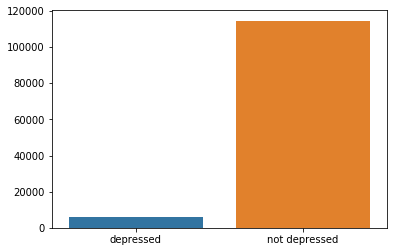

In [22]:
sns.barplot(x=['depressed', 'not depressed'], y=[final_data['target'].value_counts()[1], final_data['target'].value_counts()[0]])

In [23]:
def NLP_process(data):
    BoW=[]
    for word in data:
        BoW.append(word)
    word_bank= ' '.join(BoW)
    word_bank= word_bank.lower()
#     from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_tweets= tokenizer.tokenize(word_bank)

    sw_list = stopwords.words('english')
    sw_list += list(string.punctuation)
    sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', '.']
    sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', 'alllivesmatter' , 
            'blacklivesmatter' , 'bluelivesmatter', 'p', 'status', 'feel']
    sw_set = set(sw_list)
    filtered_tweets=[]
    for word in tokenized_tweets:
        if word not in sw_set:
            filtered_tweets.append(word)
#     
    lemmatizer=WordNetLemmatizer()
    X_lemmatized_tweets=[]
    for w in filtered_tweets:
        X_lemmatized_tweets.append(lemmatizer.lemmatize(w))
    return (X_lemmatized_tweets)

In [24]:
z=NLP_process(final_data['tweet'])


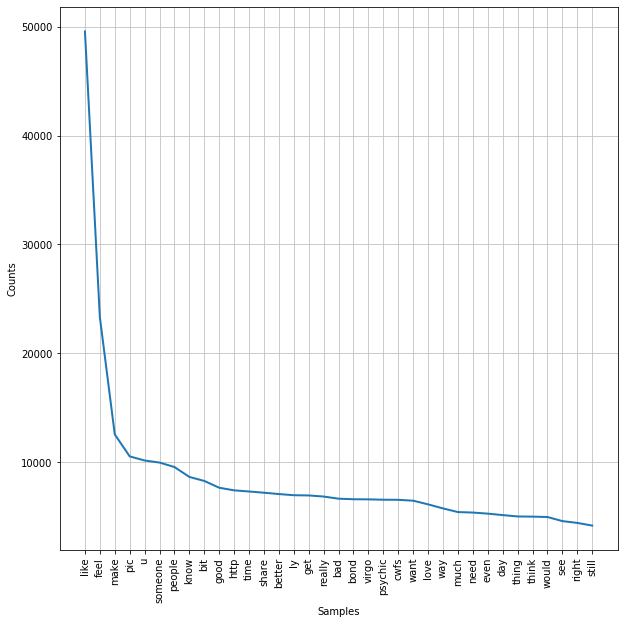

In [25]:
fdist=FreqDist(z)
plt.figure(figsize=(10,10))
fdist.plot(35)

In [26]:
depressed=final_data[final_data['target']==1]
depressed

,username,Tone,posemo,negemo,anx,anger,sad,tweet,target
30,karinaursua,1.00,0.00,8.33,0.00,0.0,8.33,im drunk but not drunk feel me,1.0
38,peanut_crunch,2.30,5.41,8.11,0.00,0.0,8.11,Finishing #InfinityTrainBook3. We just saw Gr...,1.0
51,jordan67032671,1.00,0.00,33.33,0.00,0.0,33.33,I want to meet someone who makes me feel the w...,1.0
60,artnikay,99.00,15.00,5.00,5.00,0.0,5.00,"yep huhu writing on paper feels good, idk why ...",1.0
64,bettleroni1,1.00,0.00,14.29,0.00,0.0,14.29,I feel like I should go more often to the gym👀,1.0
...,...,...,...,...,...,...,...,...,...
127728,alaskafkngreen,25.77,5.56,5.56,0.00,0.0,5.56,you’ll always feel like my soulmate even if we...,1.0
127821,teamyoutube,25.77,6.25,6.25,0.00,0.0,6.25,Since you've already appealed the suspension o...,1.0
127872,aliraza00719,1.00,0.00,16.67,0.00,0.0,16.67,What did you feel if someone says same words t...,1.0
127896,melissa59060863,1.00,7.14,14.29,7.14,0.0,7.14,"I will teach you in time, but for now restrain...",1.0


In [27]:
not_depressed=final_data[final_data['target']==0]
not_depressed

,username,Tone,posemo,negemo,anx,anger,sad,tweet,target
0,cjthesmartguy,25.77,0.00,0.00,0.00,0.00,0.00,"“Respect me to the utmost when you see me, tha...",0.0
1,sunny_1747,25.77,1.96,1.96,0.00,0.00,1.96,"Once read his interview, you may feel good ht...",0.0
2,winterdownfall,98.87,5.88,0.00,0.00,0.00,0.00,I feel that. Still hate some mf from middle sc...,0.0
3,scousetilidie,1.00,0.00,10.00,0.00,10.00,0.00,#JeremyVine I feel the teachers and teaching a...,0.0
4,ashwxxn,1.00,0.00,6.90,3.45,0.00,0.00,Well for me I told my mom that it was making m...,0.0
...,...,...,...,...,...,...,...,...,...
128164,bitchaarie,1.00,2.27,6.82,0.00,2.27,2.27,Damn my ***** actually feels sad I’m not kiddi...,0.0
128166,valerie47728456,99.00,8.70,0.00,0.00,0.00,0.00,"of+a+steel+sky.+Somehow+Arthur+feels+very,+ver...",0.0
128168,suzuacnh,99.00,15.69,0.00,0.00,0.00,0.00,"missed you too prin, i still feel sick 😔",0.0
128169,sinnerykth,99.00,11.76,0.00,0.00,0.00,0.00,guess who made lockscreens after ages ? <3\n\n...,0.0


In [28]:
a=NLP_process(depressed['tweet'])

In [29]:
b=NLP_process(not_depressed['tweet'])

In [30]:
depressed = [item for sublist in a for item in sublist]
not_depressed = [item for sublist in b for item in sublist]

In [31]:
depressed_list=FreqDist(a)
not_depressed_list=FreqDist(b)

In [32]:
depressed_list
not_depressed_list

FreqDist({'like': 47092, 'feel': 22144, 'make': 11896, 'pic': 10003, 'u': 9641, 'someone': 9431, 'people': 9092, 'know': 8177, 'bit': 7830, 'good': 7257, ...})

In [33]:
not_depressed_bar_counts = [x[1] for x in not_depressed_list.most_common(50)]
not_depressed_bar_words = [x[0] for x in not_depressed_list.most_common(50)]

In [34]:
depressed_bar_counts = [x[1] for x in depressed_list.most_common(50)]
depressed_bar_words = [x[0] for x in depressed_list.most_common(50)]

In [35]:
final_data

,username,Tone,posemo,negemo,anx,anger,sad,tweet,target
0,cjthesmartguy,25.77,0.00,0.00,0.00,0.00,0.00,"“Respect me to the utmost when you see me, tha...",0.0
1,sunny_1747,25.77,1.96,1.96,0.00,0.00,1.96,"Once read his interview, you may feel good ht...",0.0
2,winterdownfall,98.87,5.88,0.00,0.00,0.00,0.00,I feel that. Still hate some mf from middle sc...,0.0
3,scousetilidie,1.00,0.00,10.00,0.00,10.00,0.00,#JeremyVine I feel the teachers and teaching a...,0.0
4,ashwxxn,1.00,0.00,6.90,3.45,0.00,0.00,Well for me I told my mom that it was making m...,0.0
...,...,...,...,...,...,...,...,...,...
128164,bitchaarie,1.00,2.27,6.82,0.00,2.27,2.27,Damn my ***** actually feels sad I’m not kiddi...,0.0
128166,valerie47728456,99.00,8.70,0.00,0.00,0.00,0.00,"of+a+steel+sky.+Somehow+Arthur+feels+very,+ver...",0.0
128168,suzuacnh,99.00,15.69,0.00,0.00,0.00,0.00,"missed you too prin, i still feel sick 😔",0.0
128169,sinnerykth,99.00,11.76,0.00,0.00,0.00,0.00,guess who made lockscreens after ages ? <3\n\n...,0.0


In [36]:
from wordcloud import WordCloud
D_dictionary = dict(zip(depressed_bar_words, depressed_bar_counts))
ND_dictionary = dict(zip(not_depressed_bar_words, not_depressed_bar_counts))

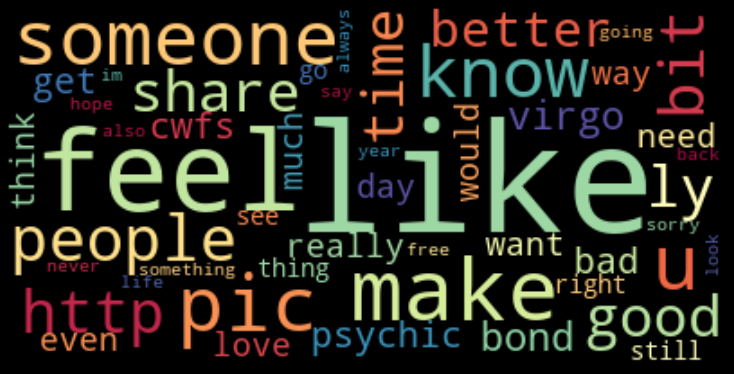

In [37]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(D_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('pos_Wcloud.png')
# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

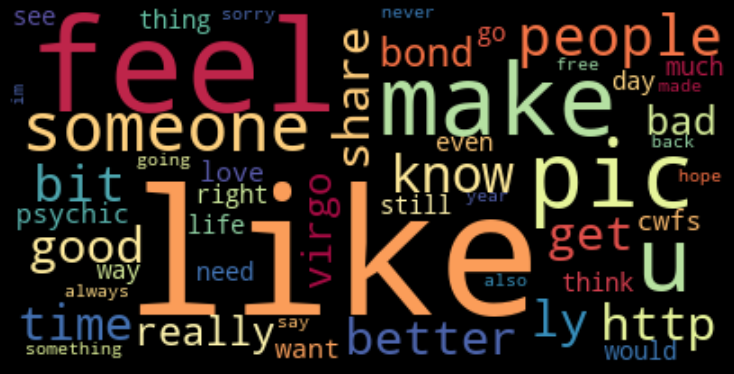

In [38]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(ND_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('pos_Wcloud.png')
# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

In [39]:
answer

<120768x97072 sparse matrix of type '<class 'numpy.float64'>'
	with 1452030 stored elements in Compressed Sparse Row format>

In [40]:
X=final_data['tweet']
y=final_data['target']

In [41]:
#using tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words=sw_set, ngram_range=(1,1), lowercase=True)
# tfidf_data_train_lem = tfidf.fit_transform()
X_b = tfidf.fit_transform(X)
# X_test_b=tfidf.transform(X_test)

In [42]:
#train, test, split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=0)

In [43]:
X_train_tfidf= tfidf.fit_transform(X_train)
X_test_tfidf= tfidf.transform(X_test)
X_train_tfidf

<96614x84601 sparse matrix of type '<class 'numpy.float64'>'
	with 1161601 stored elements in Compressed Sparse Row format>

In [44]:
X_train

67885                               I feel old too sad life
6384      I’m actually really concerned at how much ange...
44551     It feels like you share a psychic bond with so...
71285              And how do you feel about all this, Dan?
123553    I get so disrespectful when I feel tried. My m...
                                ...                        
48972     sometimes i feel that im too sensitive for thi...
125144    It feels like you share a psychic bond with so...
45543     been doing my assignment in science for 1hr bc...
46528     So feel free to be abusive as long as it's beh...
72555     I had a bf that only gave me his dick once a w...
Name: tweet, Length: 96614, dtype: object

In [45]:
y_train.value_counts()

0.0    91662
1.0     4952
Name: target, dtype: int64

In [46]:
rfc=RandomForestClassifier(n_estimators=1000, max_depth=6, n_jobs=-1, random_state=0, class_weight='balanced')

In [47]:
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [48]:
y_preds=rfc.predict(X_test_tfidf)

In [49]:
rfc_acc_score= accuracy_score(y_test, y_preds)


In [50]:
rfc_acc_score


0.8317462946095885

In [51]:
rfc_f1_score= f1_score(y_test, y_preds, average='macro')
rfc_f1_score

0.48622188936841304

In [52]:
from sklearn.metrics import recall_score
recall_score(y_test, y_preds, average='macro')


0.49226442182640173

In [53]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')

In [ ]:
clf.fit(X_train_tfidf, y_train)

In [ ]:
svm_y_preds=clf.predict(X_test_tfidf)

In [ ]:
print(accuracy_score(y_test, svm_y_preds))
print(f1_score(y_test, svm_y_preds, average='macro'))
print(recall_score(y_test, svm_y_preds, average='macro'))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression(penalty='l1',l1_ratio=.5, n_jobs=-1, random_state=0, class_weight='balanaced', C=10, solver='saga')

In [ ]:
log_clf.fit(X_train_tfidf, y_train)

In [ ]:
log_y_preds=log_clf.predict(X_test_tfidf)

In [ ]:
print(accuracy_score(y_test, log_y_preds))
print(f1_score(y_test, log_y_preds, average='macro'))
print(recall_score(y_test, log_y_preds, average='macro'))

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
marked_text = ["[CLS]" + tweet + "[SEP]" for tweet in final_data.tweet]
type(marked_text[0])

In [ ]:
tokenized_text=[tokenizer.tokenize(marked_text[i]) for i in range(120768)]


In [ ]:
len(tokenized_text)

In [ ]:
segments_ids = [1] * len(marked_text)


In [ ]:
indexed_tokens = [tokenizer.convert_tokens_to_ids(tokenized_text[i]) for i in range(120768)]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
t=indexed_tokens

In [ ]:
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    t, padding="post")

In [ ]:
tokens_tensor = torch.tensor([padded_inputs])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

In [ ]:
tokens_tensor = torch.tensor(tokens_tensor).to(torch.int64).long()

In [ ]:
# with torch.no_grad():
outputs = model(tokens_tensor, segments_tensors)
